In [11]:
%pip install mlflow scikit-learn pandas matplotlib


In [12]:
import os
os.environ["MLFLOW_TRACKING_URI"] = "file:./mlruns"


In [13]:
import mlflow
import mlflow.sklearn


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [17]:
# Load & clean data
df = pd.read_csv("data.csv")
df = df.dropna(subset=["Review text"])

X = df["Review text"]
y = df["Ratings"]

In [18]:
# Vectorize
vectorizer = TfidfVectorizer(stop_words="english")
X_vec = vectorizer.fit_transform(X)

In [19]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

In [20]:
with mlflow.start_run(run_name="Sentiment_LogReg_Ratings"):

    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

In [22]:
 # Log params
mlflow.log_param("text_column", "Review text")
mlflow.log_param("target_column", "Ratings")
mlflow.log_param("vectorizer", "TF-IDF")
mlflow.log_param("model", "LogisticRegression")
mlflow.log_param("max_iter", 200)

200

In [23]:
 # Log metric
mlflow.log_metric("accuracy", accuracy)

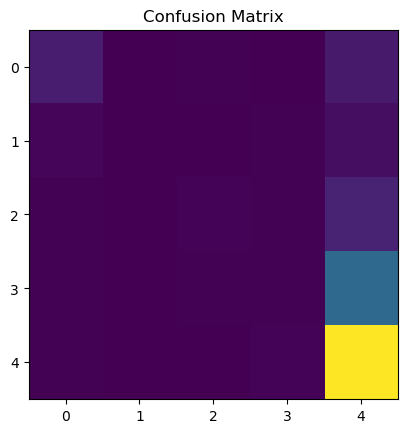

In [24]:
 # Confusion matrix artifact
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
mlflow.log_artifact("confusion_matrix.png")

In [25]:
 # Register model
mlflow.sklearn.log_model(
    model,
    artifact_path="sentiment_model",
    registered_model_name="SentimentAppModel"
)

2026/02/09 02:28:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\adith\anaconda3\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
c:\Users\adith\anaconda3\Lib\site-packages\mlflow\tracking\_model_registry\utils.py:216: FutureWarning: The filesystem model registry backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.c

In [27]:
mlflow.end_run()

In [28]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score

#for C in [0.1, 1.0, 10.0]:
 #   with mlflow.start_run(run_name=f"LogReg_C_{C}"):

  #      model = LogisticRegression(C=C, max_iter=200)
   #     model.fit(X_train, y_train)
#
 #       y_pred = model.predict(X_test)
  #      acc = accuracy_score(y_test, y_pred)
#
 #       mlflow.log_param("C", C)
  #      mlflow.log_param("model", "LogisticRegression")
   #     mlflow.log_metric("accuracy", acc)
